In [1]:
# Nondementia         0
# Very Mild Dementia  1
# Mild Dementia       2 
# Moderate Dementia   3

In [55]:
import pandas as pd
import numpy as np

#maschi 1 femmine 0
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

print(df_2.shape)
df_2.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [56]:
df_2 = df_2.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [57]:
classes = df_2['CDR'].unique()  #to create a list of labels
print(classes)

[0 1 2 3]


In [58]:
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [59]:
df_2.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

## SMOTE

In [60]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR']

os = SMOTE(random_state=0, k_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#os_data_X = df_2[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
#os_data_y= df_2[['CDR']]

os_data_X = pd.DataFrame(data=os_data_X,columns= ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])
os_data_y= pd.DataFrame(data=os_data_y,columns=['CDR']) #CDR because is our target variable

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Nondementia in oversampled data",len(os_data_y[os_data_y['CDR']==0]))
print("Number of Very Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Number of Moderate Dementia",len(os_data_y[os_data_y['CDR']==3]))
print("Number of Mild Dementia",len(os_data_y[os_data_y['CDR']==2]))
print("Proportion of Nondementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==0])/len(os_data_X))
print("Proportion of Very Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==3])/len(os_data_X))
print("Proportion of Moderate Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==2])/len(os_data_X))
print("Proportion of Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))

length of oversampled data is  364
Number of Nondementia in oversampled data 91
Number of Very Mild Dementia 91
Number of Moderate Dementia 91
Number of Mild Dementia 91
Proportion of Nondementia in oversampled data is  0.25
Proportion of Very Mild Dementia in oversampled data is  0.25
Proportion of Moderate Dementia in oversampled data is  0.25
Proportion of Mild Dementia in oversampled data is  0.25


In [61]:
df_2['CDR'] = df_2['CDR'].apply(lambda x: float(x))
#df_2['CDR']

## Multinomial Logistic Regression

In [62]:
#multinomial logistic regression
#multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, 
#i.e. with more than two possible discrete outcomes. That is, it is a model that is used to predict the probabilities of 
#the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables 
#(which may be real-valued, binary-valued, categorical-valued, etc.).

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()
#print(X_train.shape)
#print(y_train.shape)
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred, num_classes = 4, pos_indices = [0, 1, 2, 3]))
#print("Recall:",metrics.recall_score(y_test, y_pred))
#y = np.array(os_data_y)
#y = y.ravel()
#mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000).fit(os_data_X, y)
#print ("Multinomial Logistic regression Train Accuracy: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
#print ("Multinomial Logistic regression Test Accuracy: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))

Accuracy is: 0.8181818181818182


## Confusion Matrix

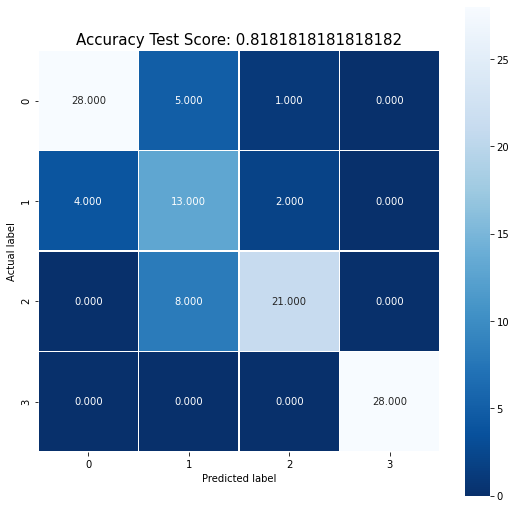

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

# RFE

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings

data_final_vars=df_2.columns.values.tolist()
#print('Our starting variables are: ' + str(data_final_vars).replace('[', '').replace(']', ''), '\n')
print('Variables, except target variable, are: ' + str(os_data_X.columns.values.tolist()), '\n')
warnings.filterwarnings("ignore")
#y=['CDR']
#X=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(logreg, 4) #we selected first four variables
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_) #this is the mask of selected features
print(rfe.ranking_) #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature
#print(rfe.estimator_)
#print(rfe[rfe.support_])


Variables, except target variable, are: ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

[False False  True  True  True False False  True]
[3 4 1 1 1 5 2 1]


In [65]:
df_RFE = os_data_X[:] #creates a copy of the previous dataframe
df_RFE = df_RFE.drop(columns = ['M/F', 'Age', 'eTIV', 'nWBV']) #dataframe with features selected with RFE
df_RFE.head()
#df_RFE = df_2.drop(columns = ['Hand', 'Delay', 'ID'])

,Educ,SES,MMSE,ASF
0,5,1,30,1.057
1,2,3,28,1.281
2,1,5,23,1.200
3,2,3,25,1.349
4,2,4,20,1.175


## Multinomial Logistic Regression on dataframe post RFE

In [66]:
#https://lorenzogovoni.com/feature-selection-rfe/

#X = df_RFE.loc[:, df_2.columns != 'CDR']
#y = df_RFE.loc[:, df_2.columns == 'CDR']
X = df_RFE.loc[:]
y = df_RFE.loc[:]

X_train, X_test, y_train, y_test = train_test_split(df_RFE, os_data_y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.8090909090909091


## Confusion matrix

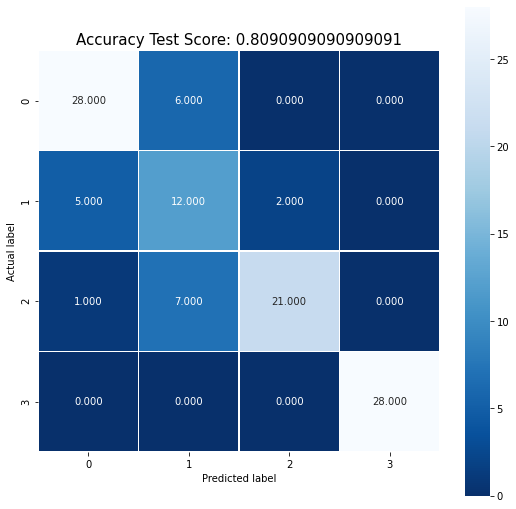

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

#### now decided to merge labels 2 and 3 and run the models

In [68]:
# Nondementia                            0
# Very Mild Dementia                     1
# Mild Dementia and Moderate Dementia    4

In [69]:
import pandas as pd
import numpy as np

#maschi 1 femmine 0
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop\alzheimer'
file = 'our_merged_dataset.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

print(df_2.shape)
df_2.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [70]:
df_2 = df_2.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [71]:
classes = df_2['CDR'].unique()  #to create a list of labels
print(classes)

[0 1 4]


In [72]:
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [73]:
df_2.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

## SMOTE

In [74]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR']

os = SMOTE(random_state=0, k_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#os_data_X = df_2[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
#os_data_y= df_2[['CDR']]

os_data_X = pd.DataFrame(data=os_data_X,columns= ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])
os_data_y= pd.DataFrame(data=os_data_y,columns=['CDR']) #CDR because is our target variable

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Nondementia in oversampled data",len(os_data_y[os_data_y['CDR']==0]))
print("Number of Very Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Number of Mild and Moderate Dementia",len(os_data_y[os_data_y['CDR']==4]))
#print("Number of Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Proportion of Nondementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==0])/len(os_data_X))
print("Proportion of Very Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))
print("Proportion of Mild and Moderate Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==4])/len(os_data_X))
#print("Proportion of Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))

length of oversampled data is  273
Number of Nondementia in oversampled data 91
Number of Very Mild Dementia 91
Number of Mild and Moderate Dementia 91
Proportion of Nondementia in oversampled data is  0.3333333333333333
Proportion of Very Mild Dementia in oversampled data is  0.3333333333333333
Proportion of Mild and Moderate Dementia in oversampled data is  0.3333333333333333


In [75]:
df_2['CDR'] = df_2['CDR'].apply(lambda x: float(x))

## Multinomial Logistic Regression


In [76]:
X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.7195121951219512


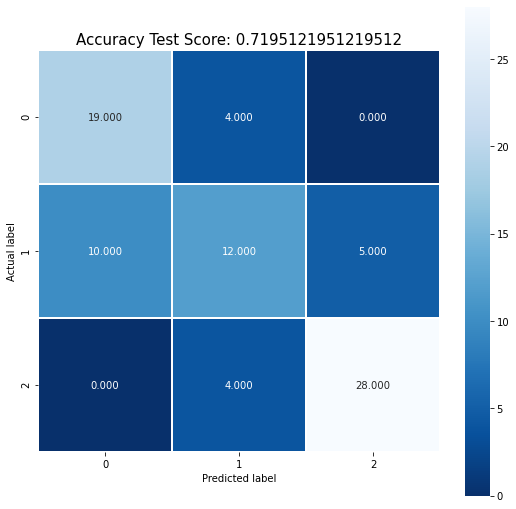

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

# RFE

In [78]:
import warnings
data_final_vars=df_2.columns.values.tolist()
#print('Our starting variables are: ' + str(data_final_vars).replace('[', '').replace(']', ''), '\n')
print('Variables, except target variable, are: ' + str(os_data_X.columns.values.tolist()), '\n')
warnings.filterwarnings("ignore")
#y=['CDR']
#X=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(logreg, 4) #we selected first four variables
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_) #this is the mask of selected features
print(rfe.ranking_) #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature

Variables, except target variable, are: ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

[ True False False False  True False  True  True]
[1 4 2 3 1 5 1 1]


In [79]:
df_RFE = os_data_X[:] #creates a copy of the previous dataframe
df_RFE = df_RFE.drop(columns = ['Educ', 'Age', 'SES', 'eTIV']) #dataframe with features selected with RFE
df_RFE.head()

,M/F,MMSE,nWBV,ASF
0,1,30,0.739,1.057
1,0,28,0.765,1.281
2,0,23,0.697,1.200
3,1,25,0.645,1.349
4,1,20,0.665,1.175


## Multinomial Logistic Regression on dataframe post RFE

In [80]:
#https://lorenzogovoni.com/feature-selection-rfe/

#X = df_RFE.loc[:, df_2.columns != 'CDR']
#y = df_RFE.loc[:, df_2.columns == 'CDR']
X = df_RFE.loc[:]
y = df_RFE.loc[:]

X_train, X_test, y_train, y_test = train_test_split(df_RFE, os_data_y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.7073170731707317


## Confusion matrix


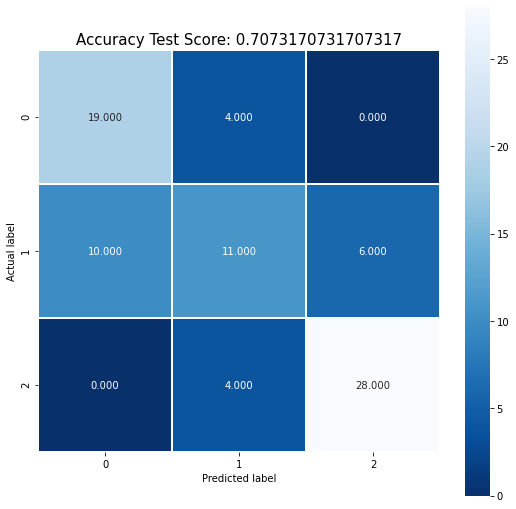

In [81]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()